In [52]:
import csv
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from typing import Optional

def plot_sentence_lengths(
    df: pd.DataFrame,
    text_col: str = 'text',
    label_col: str = 'label_text',
    figsize: tuple = (14, 6),
    bins: int = 30,
    rotation: int = 45,
    log_scale: bool = False,
    palette: Optional[str] = None,
    show_stats: bool = True
) -> None:
    """
    Plots sentence length distributions by class and overall.
    
    Args:
        df: Input DataFrame containing text and labels
        text_col: Name of column containing text (default 'text')
        label_col: Name of column containing class labels (default 'label_text')
        figsize: Figure size (default (14, 6))
        bins: Number of bins for histograms (default 30)
        rotation: X-tick rotation for class labels (default 45)
        log_scale: Whether to use log scale for y-axis (default False)
        palette: Color palette for plots (default None)
        show_stats: Whether to print length statistics (default True)
    """
    # Calculate sentence lengths
    df = df.copy()
    df['sentence_length'] = df[text_col].apply(lambda x: len(str(x).split()))
    
    if show_stats:
        print("Sentence Length Statistics:")
        print(df.groupby(label_col)['sentence_length'].describe())
    
    # Set up figure
    plt.figure(figsize=figsize)
    
    # Plot 1: Overall distribution
    plt.subplot(1, 2, 1)
    sns.histplot(
        data=df,
        x='sentence_length',
        bins=bins,
        kde=True,
        color='skyblue' if palette is None else None,
        palette=palette
    )
    plt.title('Overall Sentence Length Distribution')
    plt.xlabel('Number of Words')
    if log_scale:
        plt.yscale('log')
        plt.ylabel('Frequency (log scale)')
    else:
        plt.ylabel('Frequency')
    
    # Plot 2: By-class distribution
    plt.subplot(1, 2, 2)
    sns.boxplot(
        data=df,
        x=label_col,
        y='sentence_length',
        palette=palette
    )
    plt.title('Sentence Length by Class')
    plt.xlabel('Class Label')
    plt.ylabel('Number of Words')
    plt.xticks(rotation=rotation)
    if log_scale:
        plt.yscale('log')
    
    plt.tight_layout()
    plt.show()

    # Additional facet plot
    plt.figure(figsize=(12, 8))
    g = sns.FacetGrid(
        df,
        col=label_col,
        col_wrap=3,
        height=4,
        sharex=False,
        palette=palette
    )
    g.map(sns.histplot, 'sentence_length', bins=bins, kde=True)
    g.set_titles('{col_name}')
    g.fig.suptitle('Sentence Length Distribution by Class', y=1.02)
    plt.tight_layout()
    plt.show()

def draw_dist_binary_judgement(_df,text):

    # Draw the distribution of binary_judgement
    plt.figure(figsize=(8, 6))
    _df['label_text'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
    plt.title(text)
    plt.xlabel('Label')
    plt.ylabel('Frequency')
    plt.xticks(rotation=0)
    plt.show()
    
def parse_pubmed_file(input_filename, output_filename):
    """
    Parse the PubMed raw dataset and convert it to a CSV file with ID, TEXT, LABEL, and LABEL_TEXT columns.
    """
    # Define the mapping from section labels to numeric labels and their texts
    label_mapping = {
        'BACKGROUND': (0, 'BACKGROUND'),
        'RESULTS': (1, 'RESULTS'),
        'CONCLUSIONS': (2, 'CONCLUSIONS'),
        'METHODS': (3, 'METHODS'),
        'OBJECTIVE': (4, 'OBJECTIVE')
    }
    
    # Initialize the output file
    with open(output_filename, 'w', newline='', encoding='utf-8') as csvfile:
        writer = csv.writer(csvfile)
        
        # Define the headers for the CSV file
        headers = ['id', 'text', 'label', 'label_text']
        writer.writerow(headers)
        
        # Initialize variables to store the current record
        current_id = None
        
        # Open and read the input file
        with open(input_filename, 'r', encoding='utf-8') as file:
            for line in file:
                line = line.strip()
                
                # Check if the line starts with '###' to identify a new record
                if line.startswith('###'):
                    # Update the current ID
                    current_id = line[4:]  # Extract the ID (e.g., '24845963')
                
                # Check if the line starts with a section header
                elif line.startswith(tuple(label_mapping.keys())):
                    # Split the line into label and text
                    parts = line.split('\t')
                    if len(parts) >= 2:
                        label = parts[0]
                        text = '\t'.join(parts[1:]).strip()
                        
                        # Get the numeric label and label text from the mapping
                        numeric_label, label_text = label_mapping.get(label, (None, None))
                        
                        if numeric_label is not None:
                            # Write the current line to CSV
                            writer.writerow([current_id, text, numeric_label, label_text])

# PubMEd 20k

In [16]:
parse_pubmed_file('../assets/pubmed/pubmed-rct-master/PubMed_20k_RCT/dev.txt', '../assets/pubmed/pubmed-rct-master/PubMed_20k_RCT/dev.csv')

In [17]:
parse_pubmed_file('../assets/pubmed/pubmed-rct-master/PubMed_20k_RCT/test.txt', '../assets/pubmed/pubmed-rct-master/PubMed_20k_RCT/test.csv')

In [18]:
parse_pubmed_file('../assets/pubmed/pubmed-rct-master/PubMed_20k_RCT/train.txt', '../assets/pubmed/pubmed-rct-master/PubMed_20k_RCT/train.csv')

In [45]:
import pandas as pd
train_df = pd.read_csv('../assets/pubmed/pubmed-rct-master/PubMed_20k_RCT/train.csv')
train_df

,id,text,label,label_text
0,4293578,To investigate the efficacy of 6 weeks of dail...,4,OBJECTIVE
1,4293578,A total of 125 patients with primary knee OA w...,3,METHODS
2,4293578,Outcome measures included pain reduction and i...,3,METHODS
3,4293578,Pain was assessed using the visual analog pain...,3,METHODS
4,4293578,Secondary outcome measures included the Wester...,3,METHODS
...,...,...,...,...
180035,6227186,For the absolute change in percent atheroma vo...,1,RESULTS
180036,6227186,"For PAV , a significantly greater percentage o...",1,RESULTS
180037,6227186,Both strategies had acceptable side effect pro...,1,RESULTS
180038,6227186,"Compared with standard statin monotherapy , th...",2,CONCLUSIONS


In [22]:
df2= pd.DataFrame( train_df[['label','label_text']])


Index(['label', 'label_text'], dtype='object')

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(train_df['text'], train_df['label'], test_size=0.2, random_state=42)

# Create a TfidfVectorizer to convert text to numerical features
tfidf = TfidfVectorizer(max_features=10000, ngram_range=(1, 2))

# Transform the text data
X_train_tfidf = tfidf.fit_transform(X_train)
X_val_tfidf = tfidf.transform(X_val)

# Train a Logistic Regression model
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train_tfidf, y_train)

# Predict on the validation set
y_pred = model.predict(X_val_tfidf)

# Print classification report
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.66      0.65      0.66      4398
           1       0.88      0.88      0.88     11604
           2       0.75      0.74      0.74      5361
           3       0.87      0.92      0.89     11906
           4       0.71      0.55      0.62      2739

    accuracy                           0.82     36008
   macro avg       0.77      0.75      0.76     36008
weighted avg       0.82      0.82      0.82     36008



In [41]:
from scipy.sparse import csr_matrix
import numpy as np
# Save
np.savez('train_data.npz',
         data=X_train_tfidf.data,
         indices=X_train_tfidf.indices,
         indptr=X_train_tfidf.indptr,
         shape=X_train_tfidf.shape,
         labels=y_train.to_numpy())

np.savez('val_data.npz',
         data=X_val_tfidf.data,
         indices=X_val_tfidf.indices,
         indptr=X_val_tfidf.indptr,
         shape=X_val_tfidf.shape,
         labels=y_val.to_numpy())


In [43]:
# Load
train_data = np.load('train_data.npz')
X_train_loaded = csr_matrix((train_data['data'], 
                           train_data['indices'],
                           train_data['indptr']),
                           shape=train_data['shape'])
y_train_loaded = train_data['labels']

val_data = np.load('val_data.npz')
X_val_loaded = csr_matrix((val_data['data'], 
                           val_data['indices'],
                           val_data['indptr']),
                           shape=val_data['shape'])
y_val_loaded = val_data['labels']

In [44]:
# Train a Logistic Regression model
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train_loaded, y_train_loaded)

# Predict on the validation set
y_pred = model.predict(X_val_loaded)

# Print classification report
print(classification_report(y_val_loaded, y_pred))

              precision    recall  f1-score   support

           0       0.66      0.65      0.66      4398
           1       0.88      0.88      0.88     11604
           2       0.75      0.74      0.74      5361
           3       0.87      0.92      0.89     11906
           4       0.71      0.55      0.62      2739

    accuracy                           0.82     36008
   macro avg       0.77      0.75      0.76     36008
weighted avg       0.82      0.82      0.82     36008



In [23]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

# Prepare data for Doc2Vec
tagged_data = [TaggedDocument(words=text.split(), tags=[i]) for i, text in enumerate(X_train)]

# Train a Doc2Vec model
doc2vec_model = Doc2Vec(vector_size=1000, window=5, min_count=2, workers=4, epochs=20)
doc2vec_model.build_vocab(tagged_data)
doc2vec_model.train(tagged_data, total_examples=doc2vec_model.corpus_count, epochs=doc2vec_model.epochs)

# Generate document embeddings for training and validation sets
X_train_doc2vec = [doc2vec_model.infer_vector(text.split()) for text in X_train]
X_val_doc2vec = [doc2vec_model.infer_vector(text.split()) for text in X_val]

# Train a Logistic Regression model on Doc2Vec embeddings
doc2vec_classifier = LogisticRegression(max_iter=1000, random_state=42)
doc2vec_classifier.fit(X_train_doc2vec, y_train)

# Predict on the validation set
y_pred_doc2vec = doc2vec_classifier.predict(X_val_doc2vec)

# Print classification report
print(classification_report(y_val, y_pred_doc2vec))

              precision    recall  f1-score   support

           0       0.40      0.34      0.37      4398
           1       0.64      0.65      0.64     11604
           2       0.47      0.43      0.45      5361
           3       0.60      0.72      0.65     11906
           4       0.45      0.20      0.28      2739

    accuracy                           0.57     36008
   macro avg       0.51      0.47      0.48     36008
weighted avg       0.56      0.57      0.56     36008



In [ ]:
import pandas as pd
df = pd.read_csv('../data/raw/pubmed20k/train.csv')
df

,id,text,label,label_text
0,4293578,To investigate the efficacy of 6 weeks of dail...,4,OBJECTIVE
1,4293578,A total of 125 patients with primary knee OA w...,3,METHODS
2,4293578,Outcome measures included pain reduction and i...,3,METHODS
3,4293578,Pain was assessed using the visual analog pain...,3,METHODS
4,4293578,Secondary outcome measures included the Wester...,3,METHODS
...,...,...,...,...
180035,6227186,For the absolute change in percent atheroma vo...,1,RESULTS
180036,6227186,"For PAV , a significantly greater percentage o...",1,RESULTS
180037,6227186,Both strategies had acceptable side effect pro...,1,RESULTS
180038,6227186,"Compared with standard statin monotherapy , th...",2,CONCLUSIONS


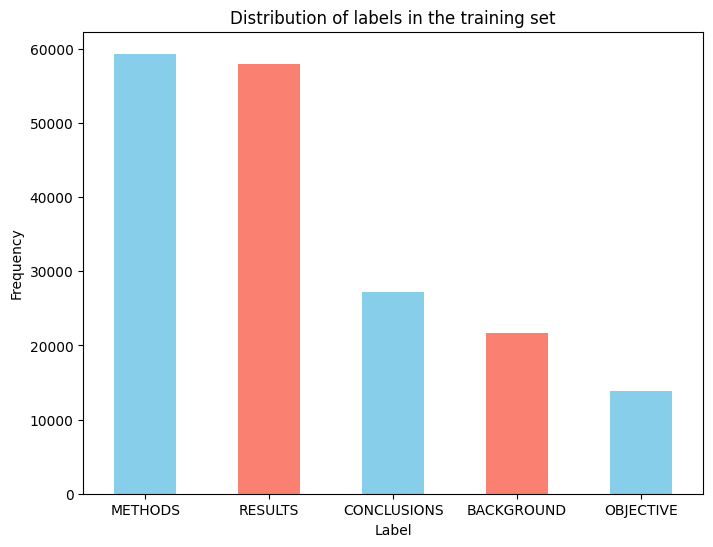

In [ ]:
draw_dist_binary_judgement(df,'Distribution of labels in the training set')

/var/folders/3f/6g751cj549sbdzh4d8njjpx80000gn/T/ipykernel_13029/2406457156.py:45: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(
/var/folders/3f/6g751cj549sbdzh4d8njjpx80000gn/T/ipykernel_13029/2406457156.py:63: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/var/folders/3f/6g751cj549sbdzh4d8njjpx80000gn/T/ipykernel_13029/2406457156.py:63: UserWarning: 
The palette list has fewer values (2) than needed (5) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(


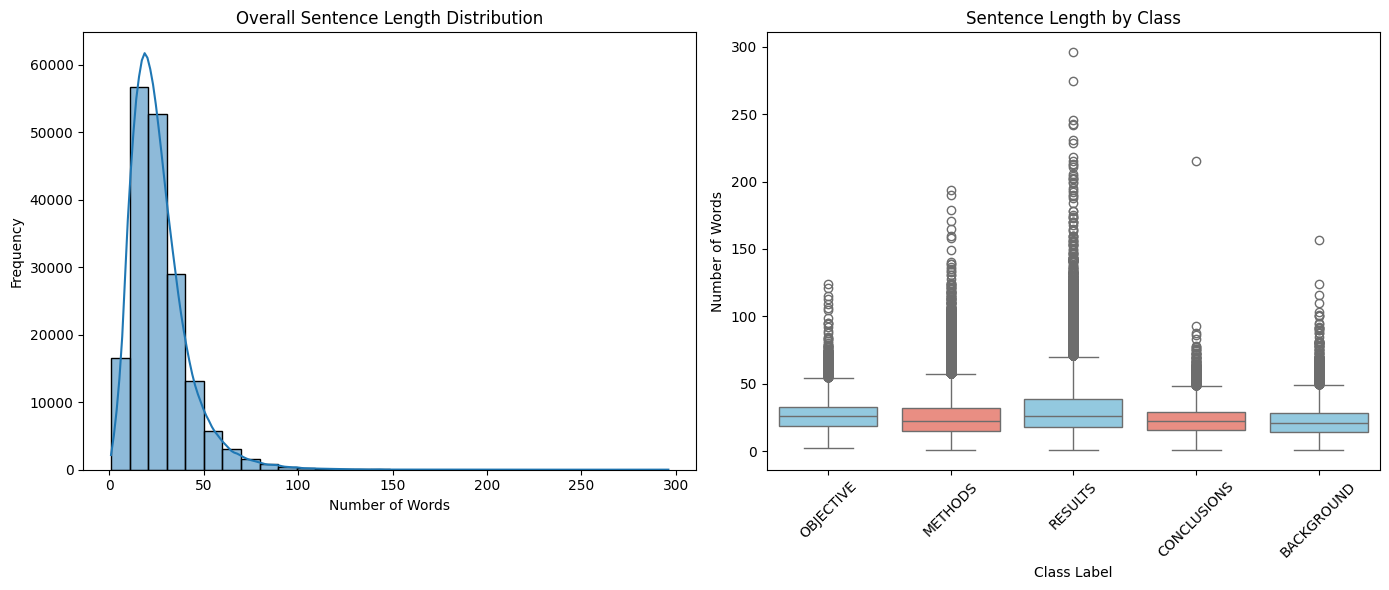

<Figure size 1200x800 with 0 Axes>

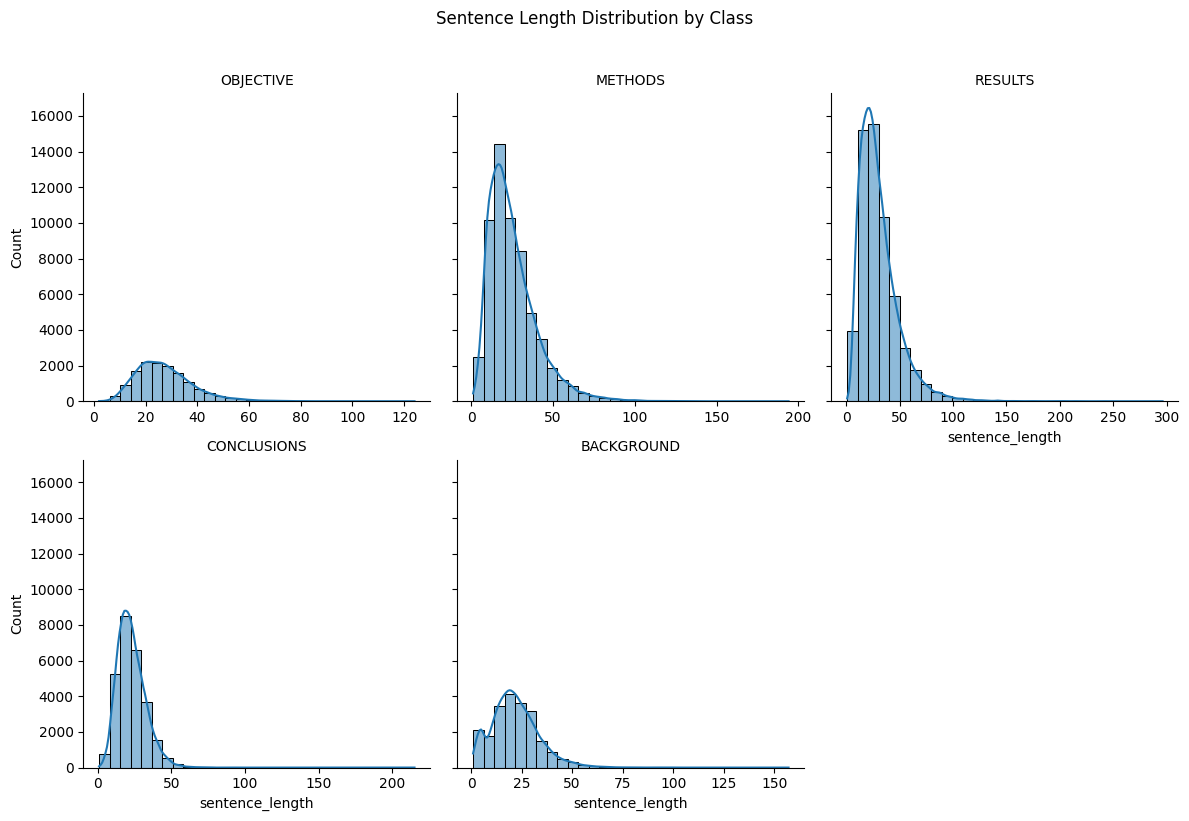

In [ ]:
plot_sentence_lengths(df,palette=['skyblue', 'salmon'], show_stats=False)

# PubMed 200K

In [ ]:
parse_pubmed_file('../assets/pubmed/pubmed-rct-master/PubMed_200k_RCT/dev.txt', '../assets/pubmed/pubmed-rct-master/PubMed_200k_RCT/dev.csv')

In [ ]:
parse_pubmed_file('../assets/pubmed/pubmed-rct-master/PubMed_200k_RCT/test.txt', '../assets/pubmed/pubmed-rct-master/PubMed_200k_RCT/test.csv')

In [ ]:
parse_pubmed_file('../assets/pubmed/pubmed-rct-master/PubMed_200k_RCT/train.txt', '../assets/pubmed/pubmed-rct-master/PubMed_200k_RCT/train.csv')

In [47]:
import pandas as pd
pubmed200k_train_df = pd.read_csv('../data/raw/pubmed200k/train.csv')
pubmed200k_test_df = pd.read_csv('../data/raw/pubmed200k/test.csv')
pubmed200k_train_df

,id,text,label,label_text
0,4491034,The emergence of HIV as a chronic condition me...,0,BACKGROUND
1,4491034,This paper describes the design and evaluation...,0,BACKGROUND
2,4491034,This study is designed as a randomised control...,3,METHODS
3,4491034,The intervention group will participate in the...,3,METHODS
4,4491034,The program is based on self-efficacy theory a...,3,METHODS
...,...,...,...,...
2211856,6042514,"After crossover , the wait-list group received...",3,METHODS
2211857,6042514,Performance was assessed by comparison to Amer...,3,METHODS
2211858,6042514,Performance improved significantly after simul...,1,RESULTS
2211859,6042514,No improvement was detected as a function of c...,1,RESULTS


In [48]:
pubmed200k_train_df['label_text'].value_counts()

label_text
RESULTS        766271
METHODS        722586
CONCLUSIONS    339714
BACKGROUND     196689
OBJECTIVE      186601
Name: count, dtype: int64

In [49]:
pubmed200k_test_df['label_text'].value_counts()

label_text
RESULTS        10276
METHODS         9751
CONCLUSIONS     4426
BACKGROUND      2663
OBJECTIVE       2377
Name: count, dtype: int64

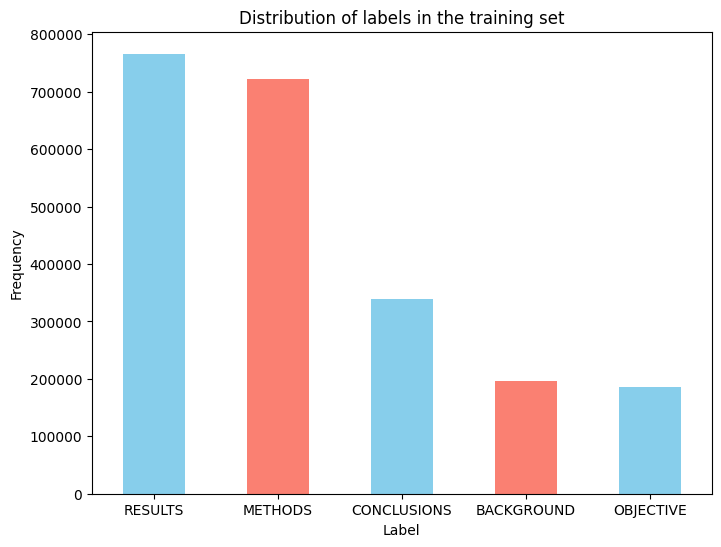

In [53]:
draw_dist_binary_judgement(pubmed200k_train_df,'Distribution of labels in the training set')

In [54]:
# Determine the minimum count among all classes
def balance_datastet(df,minimum=None):
    min_count = min(df['label_text'].value_counts().min(),minimum)
    return df.groupby('label_text').apply(lambda x: x.sample(min_count)).reset_index(drop=True)



In [55]:
balanced_sample_train = balance_datastet(pubmed200k_train_df,50000)

/var/folders/3f/6g751cj549sbdzh4d8njjpx80000gn/T/ipykernel_40657/62262076.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  return df.groupby('label_text').apply(lambda x: x.sample(min_count)).reset_index(drop=True)


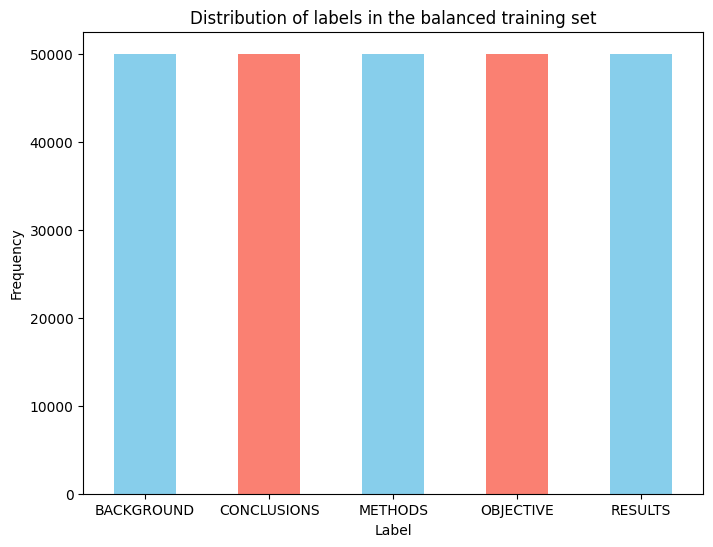

/var/folders/3f/6g751cj549sbdzh4d8njjpx80000gn/T/ipykernel_40657/2406457156.py:45: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(
/var/folders/3f/6g751cj549sbdzh4d8njjpx80000gn/T/ipykernel_40657/2406457156.py:63: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/var/folders/3f/6g751cj549sbdzh4d8njjpx80000gn/T/ipykernel_40657/2406457156.py:63: UserWarning: 
The palette list has fewer values (2) than needed (5) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(


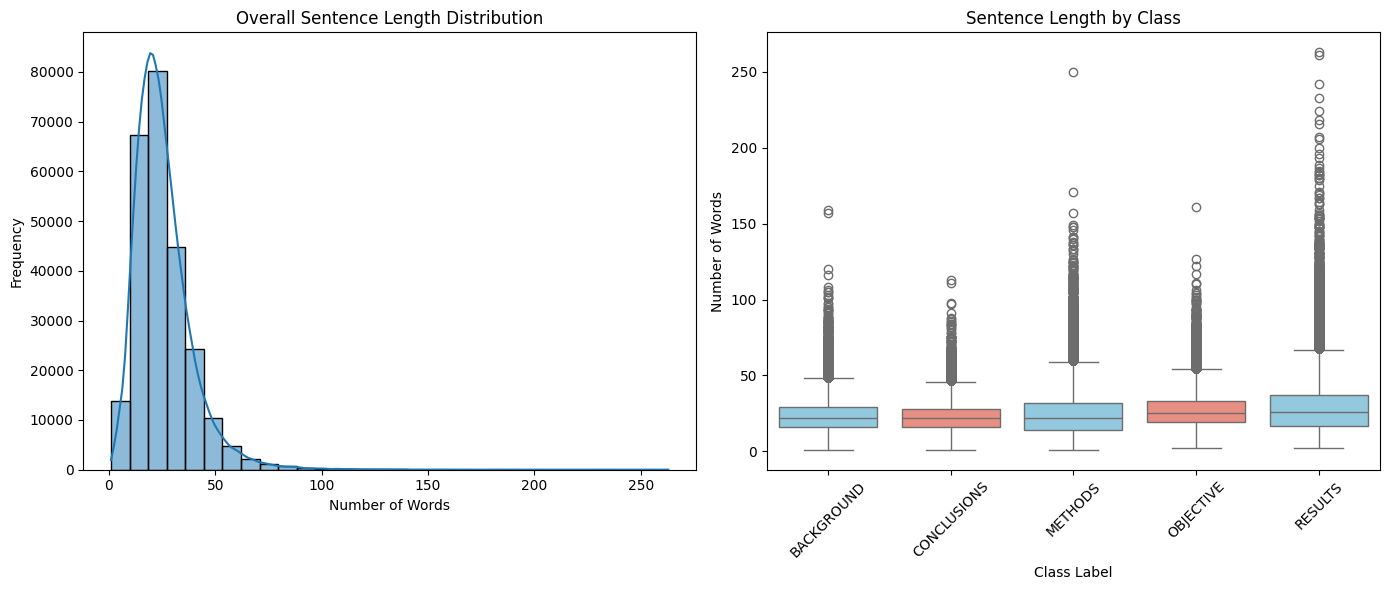

<Figure size 1200x800 with 0 Axes>

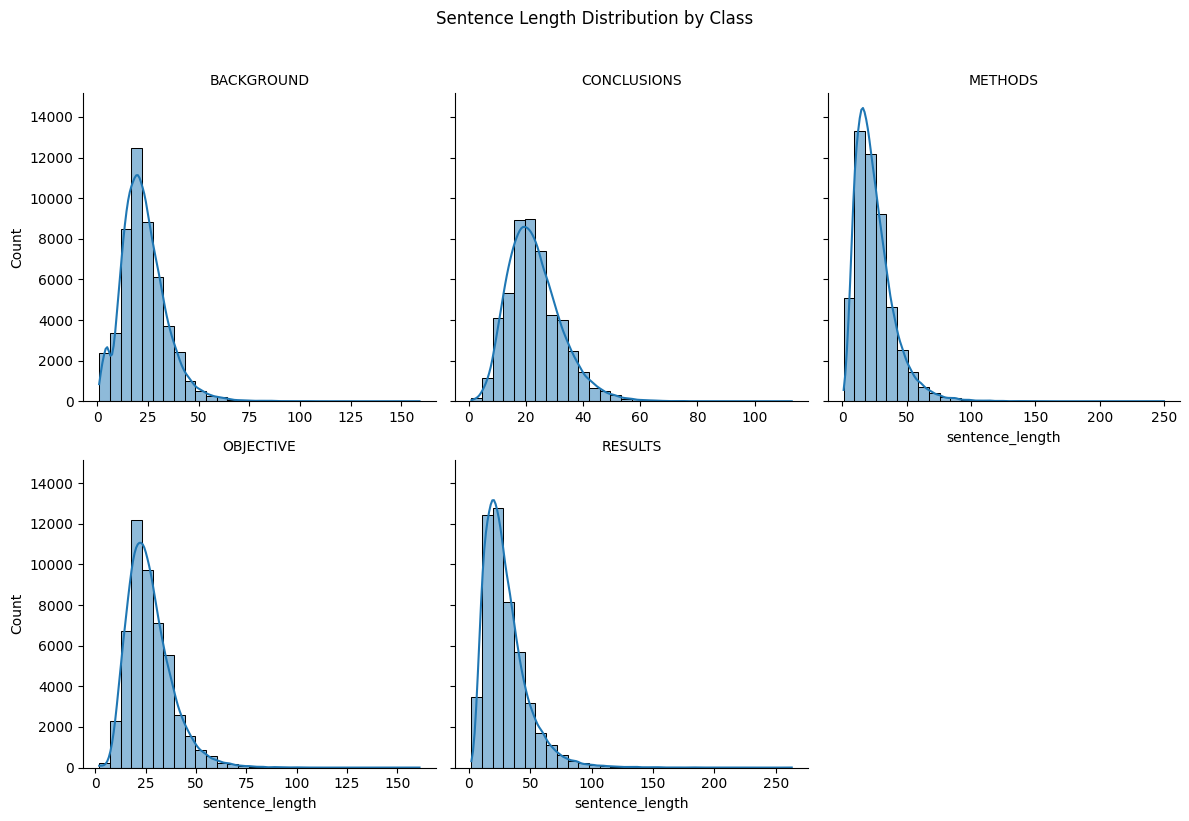

In [56]:
draw_dist_binary_judgement(balanced_sample_train,'Distribution of labels in the balanced training set')
plot_sentence_lengths(balanced_sample_train, palette=['skyblue', 'salmon'], show_stats=False)

In [57]:
balanced_sample_train.to_csv('../data/raw/pubmed_balanced/train.csv', index=False)

/var/folders/3f/6g751cj549sbdzh4d8njjpx80000gn/T/ipykernel_40657/62262076.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  return df.groupby('label_text').apply(lambda x: x.sample(min_count)).reset_index(drop=True)


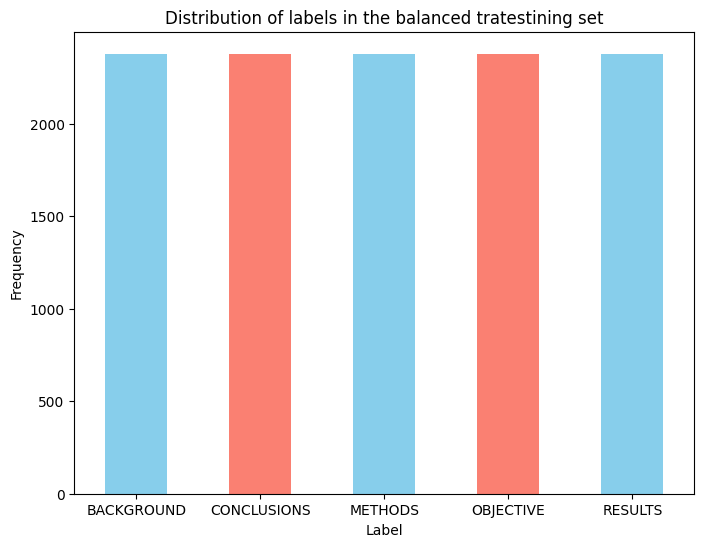

/var/folders/3f/6g751cj549sbdzh4d8njjpx80000gn/T/ipykernel_40657/2406457156.py:45: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(
/var/folders/3f/6g751cj549sbdzh4d8njjpx80000gn/T/ipykernel_40657/2406457156.py:63: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/var/folders/3f/6g751cj549sbdzh4d8njjpx80000gn/T/ipykernel_40657/2406457156.py:63: UserWarning: 
The palette list has fewer values (2) than needed (5) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(


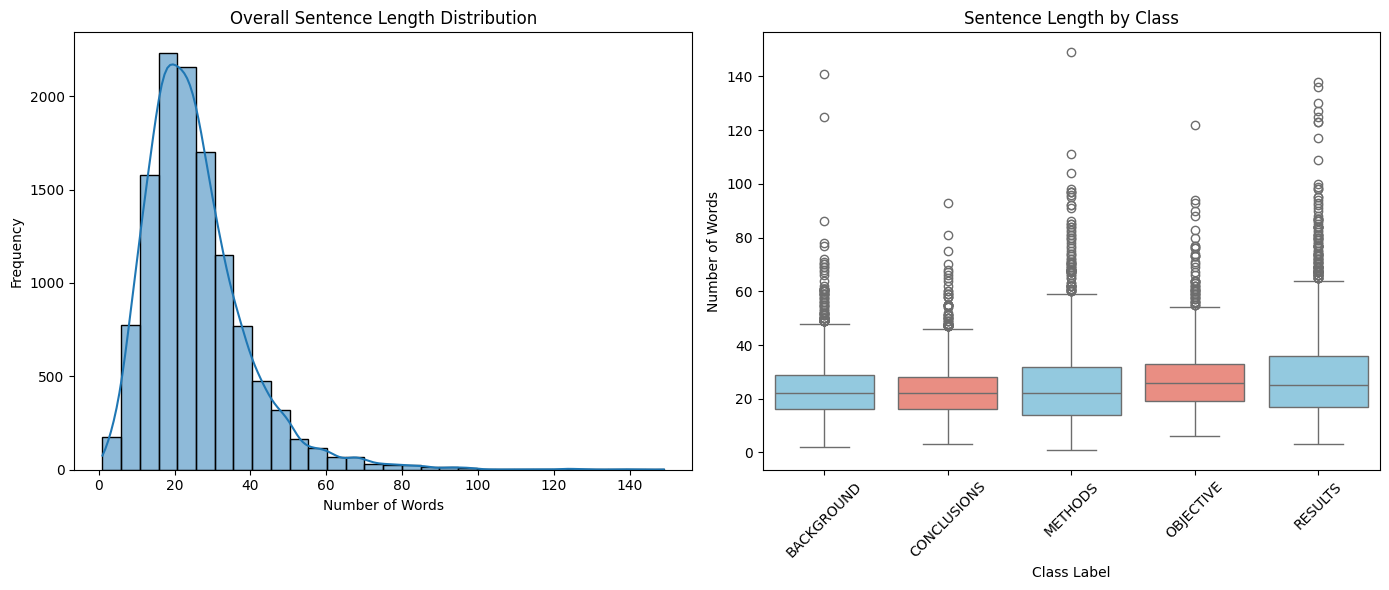

<Figure size 1200x800 with 0 Axes>

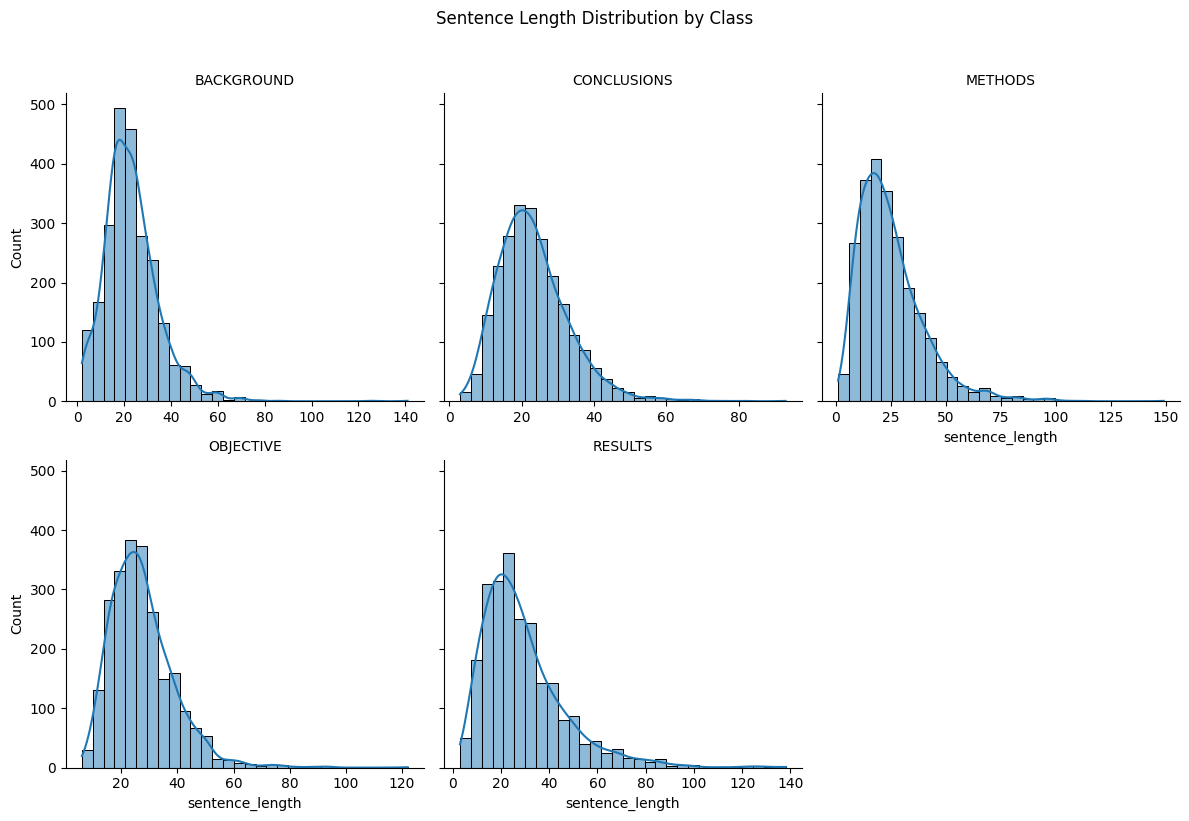

In [58]:
balanced_sample_test = balance_datastet(pubmed200k_test_df,50000)
draw_dist_binary_judgement(balanced_sample_test,'Distribution of labels in the balanced tratestining set')
plot_sentence_lengths(balanced_sample_test, palette=['skyblue', 'salmon'], show_stats=False)

In [ ]:
balanced_sample_test.to_csv('../data/raw/pubmed_balanced/test.csv', index=False)

: 

## Others

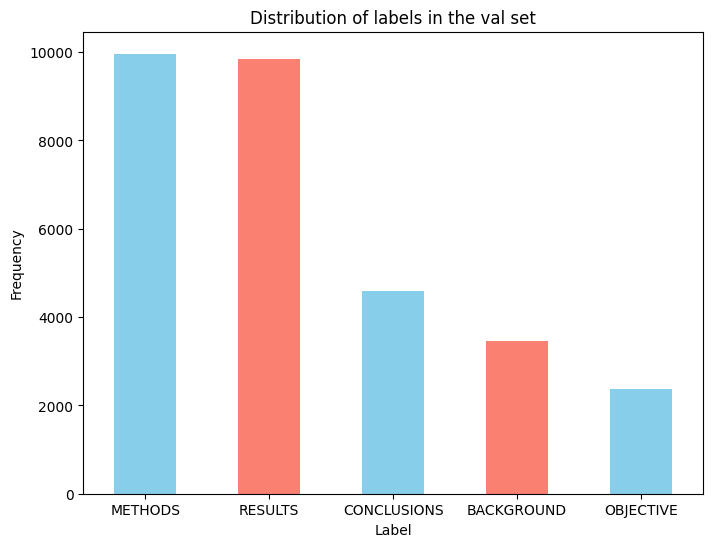

In [ ]:
df_val = pd.read_csv('../data/raw/pubmed20k/dev.csv')
draw_dist_binary_judgement(df_val,'Distribution of labels in the val set')

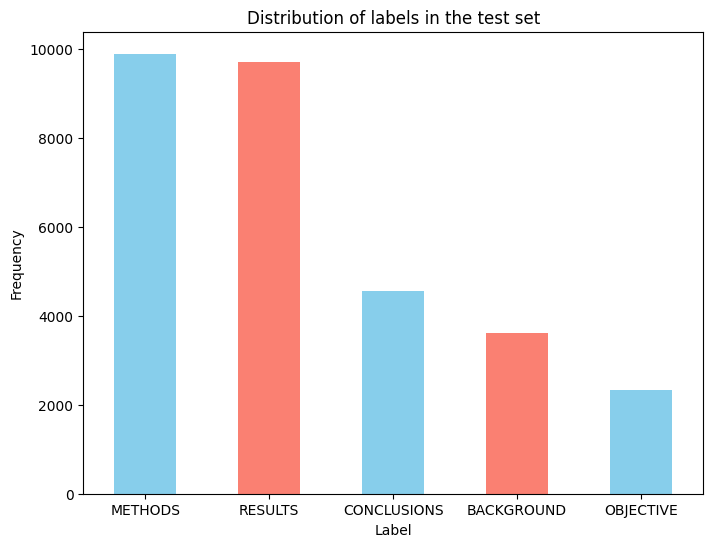

In [ ]:
df_test = pd.read_csv('../data/raw/pubmed20k/test.csv')
draw_dist_binary_judgement(df_test,'Distribution of labels in the test set')